# Data Science Final Project
Charles Laurent, Jenny Park, AJ Marino

## Part 1a - Random Forest Regressor

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import metrics

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))

pd.set_option('display.max_columns', None)

In [3]:
# TODO - Update path to files
datadir='../dev/project/CollegeScorecard_Raw_Data'

In [4]:
# import collegedatalib
import collegedatahelper

In [5]:
data_dict = collegedatahelper.create_data_dict(datadir)

In [48]:
df = data_dict['2012_13']
df_13 = data_dict['2013_14']
df_new = data_dict['2017_18']

In [7]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 1])
df_priv = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 2])
df_priv_profit = collegedatahelper.clean_df(df.loc[df['CONTROL'] == 3])

In [8]:
df.loc[df['CONTROL'] == 1]

UNITID    OPEID  OPEID6  \
0       100654   100200    1002   
1       100663   105200    1052   
3       100706   105500    1055   
4       100724   100500    1005   
5       100751   105100    1051   
...        ...      ...     ...   
7678  41724801  2245303   22453   
7781  46163401  4176201   41762   
7782  46163402  4176202   41762   
7783  46163403  4176205   41762   
7784  46163404  4176206   41762   

                                               INSTNM        CITY STABBR  \
0                            Alabama A & M University      Normal     AL   
1                 University of Alabama at Birmingham  Birmingham     AL   
3                 University of Alabama in Huntsville  Huntsville     AL   
4                            Alabama State University  Montgomery     AL   
5                           The University of Alabama  Tuscaloosa     AL   
...                                               ...         ...    ...   
7678                    Connecticut Aero Tech  School    Hartford     CT   
7781   Twin Rivers Adult School - Grand Avenue Center  Sacramento     CA   
7782  Twin Rivers Adult School - Arnold Avenue Center   McClellan     CA   
7783                  Greater Sacramento Urban League  Sacramento     CA   
7784                                            I-TAP  Sacramento     CA   

             ZIP  ACCREDAGENCY  INSTURL  NPCURL  SCH_DEG  HCM2  MAIN  \
0          35762           NaN      NaN     NaN      3.0   NaN     1   
1     35294-0110           NaN      NaN     NaN      3.0   NaN     1   
3          35899           NaN      NaN     NaN      3.0   NaN     1   
4     36104-0271           NaN      NaN     NaN      3.0   NaN     1   
5     35487-0166           NaN      NaN     NaN      3.0   NaN     1   
...          ...           ...      ...     ...      ...   ...   ...   
7678       06114           NaN      NaN     NaN      1.0   NaN     0   
7781  95838-3654           NaN      NaN     NaN      1.0   NaN     0   
7782   956521025           NaN      NaN     NaN      1.0   NaN     0   
7783   958383738           NaN      NaN     NaN      1.0   NaN     0   
7784  95841-2989           NaN      NaN     NaN      1.0   NaN     0   

      NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  LOCALE  LOCALE2  \
0             1        3        4        1        1       5     NaN      NaN   
1             1        3        4        1        1       5     NaN      NaN   
3             1        3        4        1        1       5     NaN      NaN   
4             1        3        4        1        1       5     NaN      NaN   
5             1        3        4        1        1       5     NaN      NaN   
...         ...      ...      ...      ...      ...     ...     ...      ...   
7678          2        0        0        1        9       1     NaN      NaN   
7781          5        0        0        1        6       8     NaN      NaN   
7782          5        0        0        1        6       8     NaN      NaN   
7783          5        0        0        1        6       8     NaN      NaN   
7784          5        0        0        1        6       8     NaN      NaN   

      LATITUDE  LONGITUDE  CCBASIC  CCUGPROF  CCSIZSET  HBCU  PBI  ANNHI  \
0          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
1          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
3          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
4          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
5          NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
...        ...        ...      ...       ...       ...   ...  ...    ...   
7678       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7781       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7782       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7783       NaN        NaN      NaN       NaN       NaN   NaN  NaN    NaN   
7784       N

In [9]:
# DEBT_N
# GRAD_DEBT_N
# WDRAW_DEBT_N

# LO_INC_DEBT_N
# MD_INC_DEBT_N
# HI_INC_DEBT_N

# FEMALE_DEBT_N
# MALE_DEBT_N

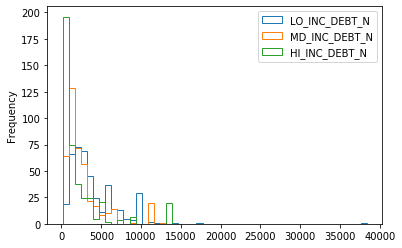

In [10]:
# df_pub.hist(column='LO_INC_DEBT_N')
# df_pub.hist(column='MD_INC_DEBT_N')
# df_pub.hist(column='HI_INC_DEBT_N')


data = {
    'LO_INC_DEBT_N': df_pub['LO_INC_DEBT_N'],
    'MD_INC_DEBT_N': df_pub['MD_INC_DEBT_N'],
    'HI_INC_DEBT_N': df_pub['HI_INC_DEBT_N']
}
df_debt = pd.DataFrame(data)
# df_debt = pd.DataFrame(
#     [df_pub['LO_INC_DEBT_N'], 
#     df_pub['MD_INC_DEBT_N'], 
#     df_pub['HI_INC_DEBT_N']]
# )

bins = 50

# df_debt.head()

# df_debt.hist()
ax = df_debt.plot.hist(bins=bins, histtype='step')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a6d3e09d0>]],
      dtype=object)

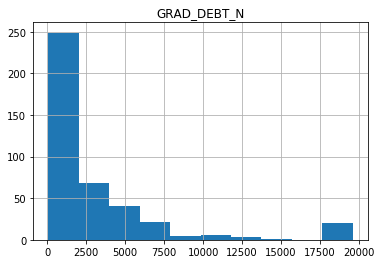

In [11]:
df_pub.hist(column='GRAD_DEBT_N')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20df4c50>]],
      dtype=object)

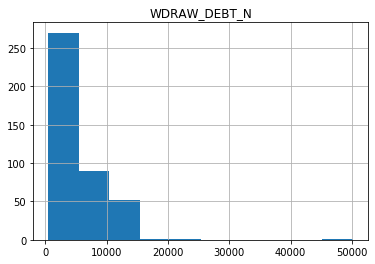

In [12]:
df_pub.hist(column='WDRAW_DEBT_N')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a64f1c9d0>]],
      dtype=object)

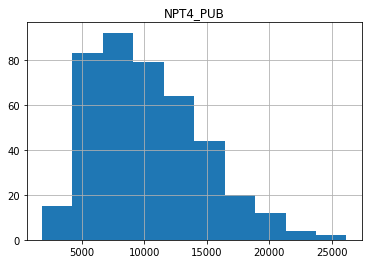

In [13]:
df_pub.hist(column='NPT4_PUB')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a232c14d0>]],
      dtype=object)

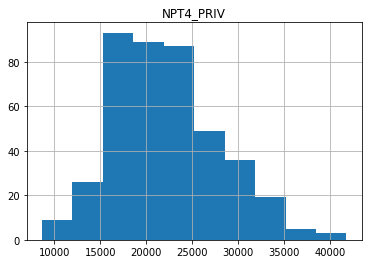

In [14]:
df_priv.hist(column='NPT4_PRIV')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a84253a50>]],
      dtype=object)

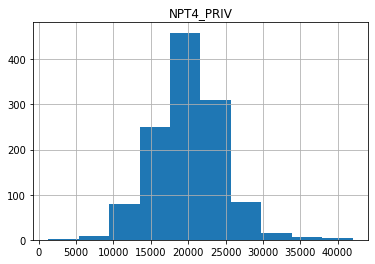

In [15]:
df_priv_profit.hist(column='NPT4_PRIV')

In [16]:
# train_features['DEBT_N']

In [17]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
# rf.fit(train_features, train_labels);


In [18]:
train_labels = []

for col in df_pub.columns:
    if df_pub[col].dtypes != 'object':
        train_labels.append(col)

In [19]:
# train_labels

In [20]:
train_labels.remove('UNITID')
train_labels.remove('OPEID')
train_labels.remove('OPEID6')


In [21]:
train_features = df_pub.copy()[train_labels]

In [22]:
train_features

SCH_DEG  MAIN  NUMBRANCH  PREDDEG  HIGHDEG  CONTROL  ST_FIPS  REGION  \
5         3.0     1          1        3        4        1        1       5   
15        2.0     1          1        2        2        1        1       5   
20        2.0     1          1        2        2        1        1       5   
28        2.0     1          1        2        2        1        1       5   
29        2.0     1          1        2        2        1        1       5   
...       ...   ...        ...      ...      ...      ...      ...     ...   
5424      2.0     1          1        2        2        1       24       2   
5532      2.0     0          2        2        2        1       53       8   
5599      3.0     0          3        1        2        1        5       5   
6175      3.0     0          3        3        4        1       12       5   
6659      3.0     0          2        3        0        1       27       4   

      PCIP01  PCIP03  PCIP04  PCIP05  PCIP09  PCIP10  PCIP11  PCIP12  PCIP13  \
5     0.0000  0.0036     0.0  0.0033  0.1087  0.0000  0.0056  0.0000  0.0819   
15    0.0059  0.0000     0.0  0.0000  0.0000  0.0000  0.0197  0.0000  0.0000   
20    0.0058  0.0000     0.0  0.0000  0.0000  0.0000  0.0174  0.0511  0.0000   
28    0.0298  0.0000     0.0  0.0000  0.0000  0.0138  0.0665  0.0367  0.0000   
29    0.0148  0.0000     0.0  0.0000  0.0000  0.0000  0.0141  0.0155  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5424  0.0106  0.0000     0.0  0.0000  0.0000  0.0000  0.0314  0.0051  0.0234   
5532  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0741  0.0000  0.0015   
5599  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000  0.0138  0.0124   
6175  0.0000  0.0309     0.0  0.0000  0.0497  0.0000  0.0000  0.0000  0.0752   
6659  0.0000  0.0000     0.0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   

      PCIP14  PCIP15  PCIP16  PCIP19  PCIP22  PCIP23  PCIP24  PCIP25  PCIP26  \
5     0.0745  0.0000  0.0087  0.0658  0.0000  0.0172  0.0000     0.0   0.035   
15    0.0000  0.0000  0.0000  0.0000  0.0434  0.0000  0.5148     0.0   0.000   
20    0.0000  0.0260  0.0000  0.0145  0.0193  0.0000  0.1861     0.0   0.000   
28    0.0000  0.0802  0.0000  0.0367  0.0000  0.0000  0.2422     0.0   0.000   
29    0.0000  0.0843  0.0000  0.0049  0.0014  0.0000  0.4301     0.0   0.000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5424  0.0051  0.0365  0.0069  0.0062  0.0106  0.0000  0.3341     0.0   0.000   
5532  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.5492     0.0   0.003   
5599  0.0000  0.0509  0.0000  0.0000  0.0000  0.0000  0.1774     0.0   0.000   
6175  0.0000  0.0000  0.0000  0.0000  0.0000  0.0658  0.0523     0.0   0.000   
6659  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000     0.0   0.000   

      PCIP27  PCIP29  PCIP30  PCIP31  PCIP38  PCIP39  PCIP40  PCIP41  PCIP42  \
5     0.0067  0.0000  0.0192  0.0000  0.0045     0.0  0.0107  0.0000  0.0397   
15    0.0000  0.0000  0.0000  0.0059  0.0000     0.0  0.0000  0.0000  0.0000   
20    0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
28    0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
29    0.0000  0.0056  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
5424  0.0000  0.0000  0.0099  0.0080  0.0000     0.0  0.0000  0.0018  0.0000   
5532  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0061  0.0000  0.0000   
5599  0.0000  0.0000  0.0303  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   
6175  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0980   
6659  0.0000  0.0000  0.0000  0.0000  0.0000     0.0  0.0000  0.0000  0.0000   

      PCIP43  PCIP44  PCIP45  PCIP46  PCIP47  PCIP48  PCIP49  PCIP50  PCIP51  \
5     0.0207  0.0132  0.0522  0.0000  0.0000  0.0000  0.0000  0.0366  0.0953   
15    0.0000  0.0000  0.00

In [23]:
target = train_features['DEBT_N']

# train_features_array = train_features.iloc[:, : 400]
train_features_array = train_features

In [24]:
# Train the model on training data
rf.fit(train_features_array, target)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [25]:
rf.feature_importances_

array([7.41518374e-05, 1.62615984e-06, 1.42202688e-03, 5.81074369e-08,
       3.10607713e-05, 0.00000000e+00, 1.04867972e-04, 7.99098446e-05,
       3.05231232e-05, 3.82390821e-07, 4.78717142e-06, 1.09506907e-07,
       1.54194168e-06, 4.20148089e-07, 3.07853559e-07, 2.34056202e-07,
       5.00466614e-07, 3.39697205e-07, 4.77040596e-07, 9.39126383e-07,
       8.01520966e-07, 1.83272947e-06, 2.31718647e-07, 4.74199385e-07,
       2.65434091e-05, 1.38685441e-06, 8.43274734e-07, 6.94502159e-10,
       6.17195478e-06, 3.87176630e-07, 3.22286858e-07, 2.11907383e-11,
       1.31171948e-06, 3.09580012e-06, 2.65249475e-07, 8.22621885e-07,
       2.87891996e-06, 2.79627082e-07, 2.00770506e-05, 1.01532723e-07,
       1.19046511e-07, 3.10514898e-05, 1.83222070e-06, 4.34425705e-07,
       2.16419373e-06, 2.45503123e-07, 4.83917308e-08, 3.06073585e-08,
       4.72955426e-05, 8.77876094e-08, 8.41575867e-08, 9.76095396e-09,
       1.04585803e-08, 7.36317023e-09, 0.00000000e+00, 3.03816311e-08,
      

In [26]:
train_features_array.columns

Index(['SCH_DEG', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL',
       'ST_FIPS', 'REGION', 'PCIP01', 'PCIP03',
       ...
       'FIRSTGEN_RPY_3YR_RT_SUPP', 'NOTFIRSTGEN_RPY_3YR_RT_SUPP', 'ICLEVEL',
       'UGDS_MEN', 'UGDS_WOMEN', 'CDR3_DENOM', 'CDR2_DENOM',
       'D_PCTPELL_PCTFLOAN', 'OPENADMP', 'UGNONDS'],
      dtype='object', length=852)

In [27]:
important_features_dict = {}
for x,i in enumerate(rf.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

# important_features_list

In [28]:
top_features = train_features_array.columns[important_features_list]

In [29]:
top_features[:20]

Index(['DEBT_N', 'CUML_DEBT_N', 'LOAN_YR2_N', 'FEMALE_DEBT_N', 'SEPAR_DT_N',
       'LOAN_YR3_N', 'MALE_DEBT_N', 'NOTFIRSTGEN_DEBT_N', 'RPY_1YR_N',
       'FEMALE_RPY_1YR_N', 'REPAY_DT_N', 'MD_INC_DEBT_N', 'MALE_RPY_1YR_N',
       'CDR2_DENOM', 'PAR_ED_N', 'NOT1STGEN_YR2_N', 'DEP_YR2_N', 'DEP_INC_N',
       'MD_INC_YR2_N', 'PELL_RPY_1YR_N'],
      dtype='object')

In [30]:
features_dir = './data'

In [31]:
# features_df = pd.read_csv(f'{features_dir}/dictionary.csv', low_memory=False)[['VARIABLE NAME', 'dev-category', 'API data type', 'NAME OF DATA ELEMENT']]
features_df = collegedatahelper.get_features_dictionary(features_dir)

In [32]:
features_df['dev-category'].unique()

array(['root', 'school', 'admissions', 'academics', 'student', 'cost',
       'aid', 'completion', 'repayment', 'earnings'], dtype=object)

In [33]:
# train_feature_categories = [
#     'admissions',
#     'academics',
#     'student',
#     'cost'
# ]
train_feature_categories = collegedatahelper.train_feature_categories

In [34]:
train_features = collegedatahelper.getTrainFeatures(features_df)

len(train_features)

414

In [49]:
df_blah = collegedatahelper.format_df(df, True)

df_blah_13 = collegedatahelper.format_df(df_13, True)

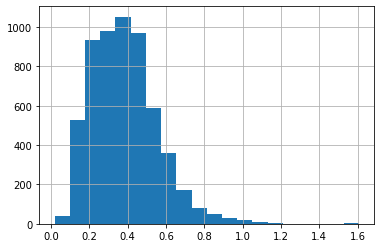

In [53]:
df_blah['debt_to_income'].hist(bins=20)


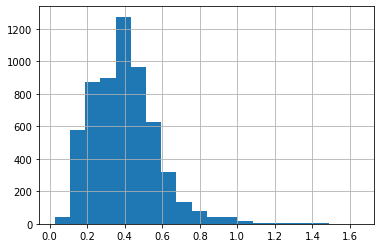

In [54]:
df_blah_13['debt_to_income'].hist(bins=20)

In [57]:
# CONTROL 
# 1 - Public
# 2 - Private non-profit
# 3 - Private for-profit
df_pub_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 1]
df_priv_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 2]
df_priv_profit_blah = df_blah_13.loc[df_blah_13['CONTROL'] == 3]

In [58]:
df_pub_blah.shape

(1673, 1978)

In [63]:
# TODO CL - should create a function for this!!!!

rows = df_pub_blah.shape[0]
df_pub_blah = df_pub_blah.dropna(axis=1, thresh=rows*0.7)

df_pub_blah = df_pub_blah.dropna(axis=0) 



In [69]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 


In [70]:
train_features_true = intersection(df_pub_blah.columns, train_features)

In [59]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data


In [71]:
rf2.fit(df_pub_blah[train_features_true], df_pub_blah['debt_to_income'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [75]:
important_features_dict = {}
for x,i in enumerate(rf2.feature_importances_):
    important_features_dict[x]=i


important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

In [76]:
top_features = train_features_array.columns[important_features_list]

In [77]:
top_features[:20]

Index(['NPT4_3075_PUB', 'NPT4_75UP_PUB', 'NUM44_PUB', 'CIP54CERT2',
       'NUM45_PUB', 'CIP52ASSOC', 'NPT4_048_PUB', 'CIP12BACHL', 'CIP54BACHL',
       'PCIP31', 'UGDS_WHITE', 'NUM41_PUB', 'UGDS_BLACK', 'UGDS_2MOR',
       'CIP52BACHL', 'CIP52CERT4', 'DISTANCEONLY', 'NUM43_PUB', 'CIP54CERT1',
       'NUM42_PUB'],
      dtype='object')